#Campus Recruitment Prediction With Machine Learning for MBA Students


 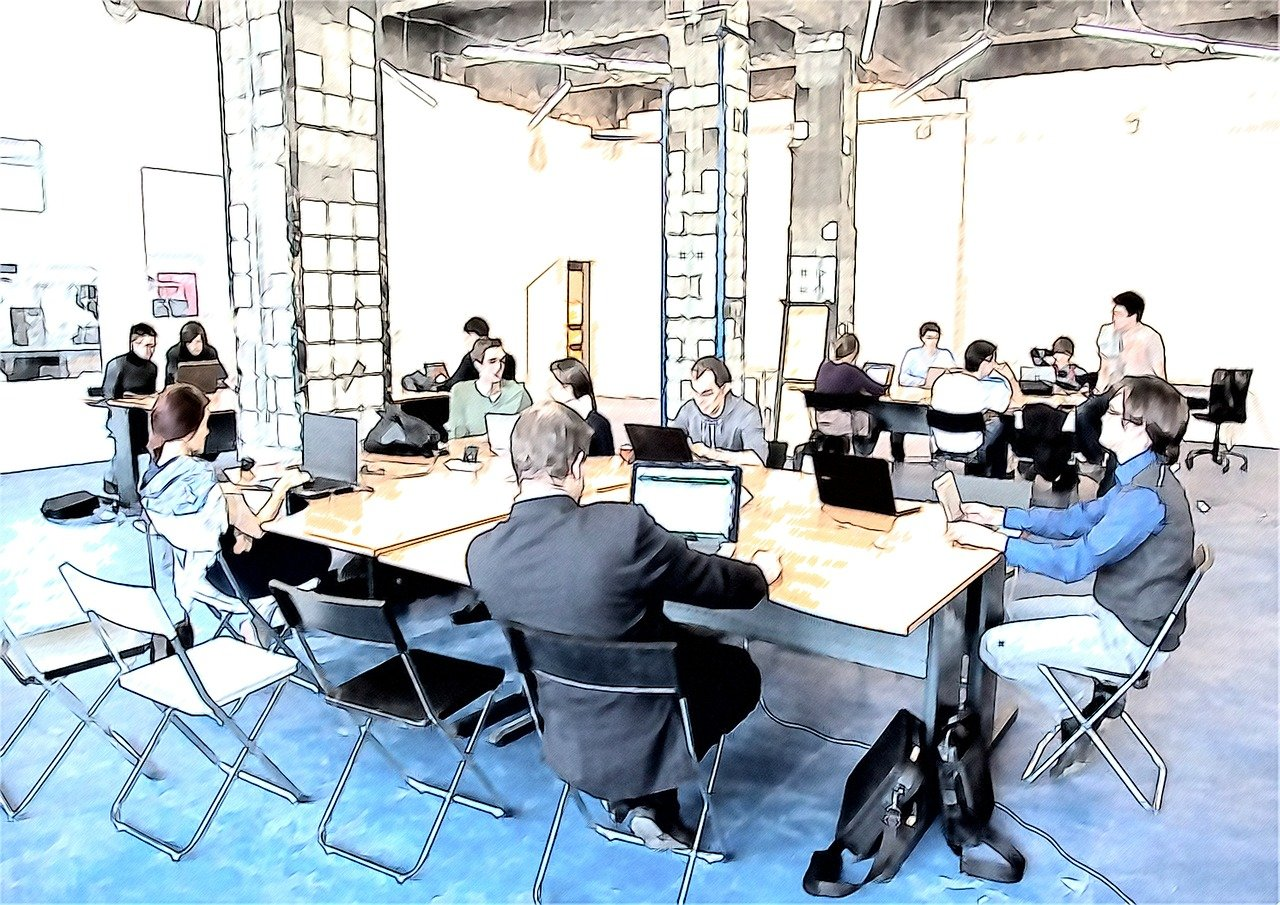

**Student Name: AHAMED M.F.R** <br>
**Registration Number: EG/2020/3807** <br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [6]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

## Data Loading

In [7]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

# Print the first five rows of the loaded dataframe

# Your code goes here
df.head(5)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here
df=df.drop('sl_no',axis=1)

## Exploratory Data Analysis (EDA)

In [9]:
# Identify the shape of the loaded dataframe

# Your code goes here
df.shape

(215, 14)

In [10]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A: <br>Categorical - gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status <br>
numerical-ssc_p, hsc_p,degree_p, etest_p, mba_p, salary**


In [11]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A**:<br> Train is the dataset which used to train the model. The model learns patterns and relationships within the data to make predictions. Therefore we only need to visualize the train dataset. Therefore, we no need to use the test dataset which is used to eveluate the model's performence.

In [12]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here
X = df.drop('status',axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [13]:
# Print number of training data points

# Your code goes here
print("number of training data points:", y_train.shape[0])


number of training data points: 172


In [14]:
# Print number of testing data points

# Your code goes here
print("number of testing data points:", y_test.shape[0])

number of testing data points: 43


c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


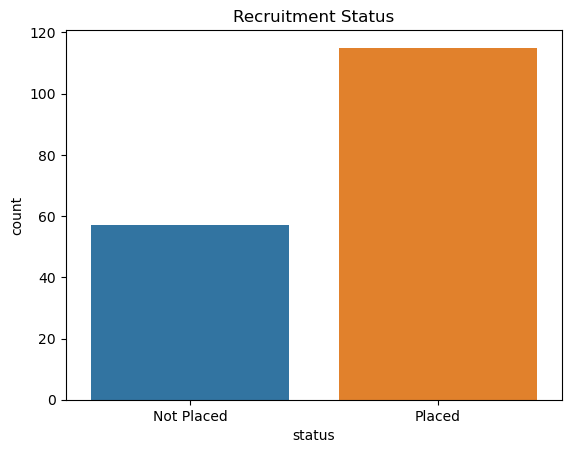

In [15]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here
sns.countplot(data=pd.DataFrame({"status": y_train}), x="status")
plt.title(f"Recruitment Status")
plt.show()

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br> yes. the dataset is imbalanced.<br>
1. The modal output can be biased towards the majority class.<br>
2. The minority class may not have enough representation for the model to learn meaningful patterns. As a result, the model may struggle to make accurate predictions for instances of the minority class<br>
3. The model peformance in majority class can be high.A model might achieve high accuracy by simply predicting the majority class, but it may perform poorly on the minority class. Therefore accuracy of the model may not reflect the models performance. <br>



c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

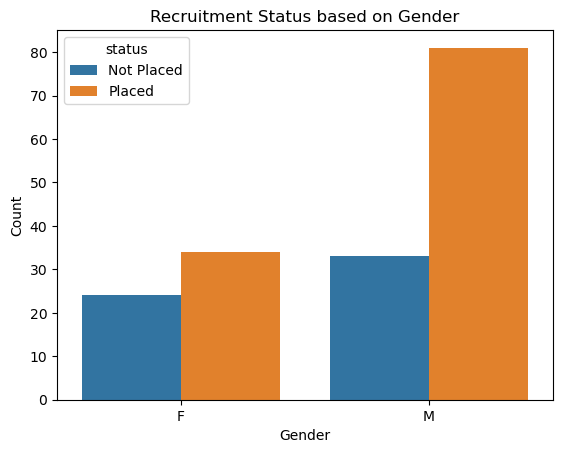

In [16]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here

train_data = pd.concat([X_train, y_train], axis=1)

sns.countplot(x="gender", hue="status", data=train_data)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title(f"Recruitment Status based on Gender")

plt.legend(title="status")
plt.show()


**Q:** Explain the observation from the above table.
> **A:** Here can be seen that there is more male in the dataset. But the pecentage of a female candidate to be hired is higher than the male candidate to be hired. This depicts that if a candidate is female,there is more chance to be hired

c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

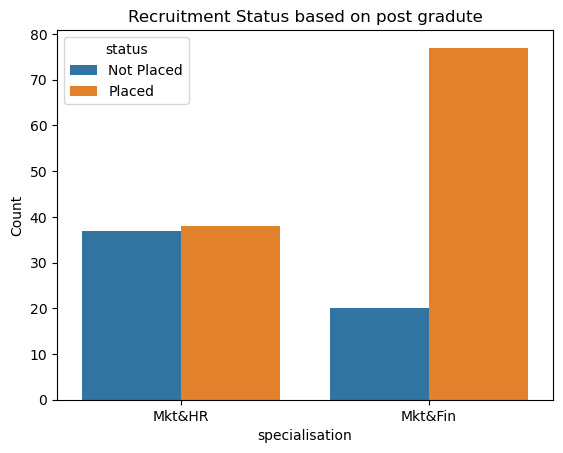

In [17]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
sns.countplot(x="specialisation", hue="status", data=train_data)

plt.xlabel("specialisation")
plt.ylabel("Count")
plt.title(f"Recruitment Status based on post gradute")

plt.legend(title="status")
plt.show()

**Q:** Inteprete the above results.
> **A:**Here can be seen that the pecentage of recruiting the candidate who has done HR as post greduation is higher than candidate who has done FIN as the post graduation. This depicts that if a candidate has a HR in post graduation study ,that candidate has more chance to be hired.  

c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

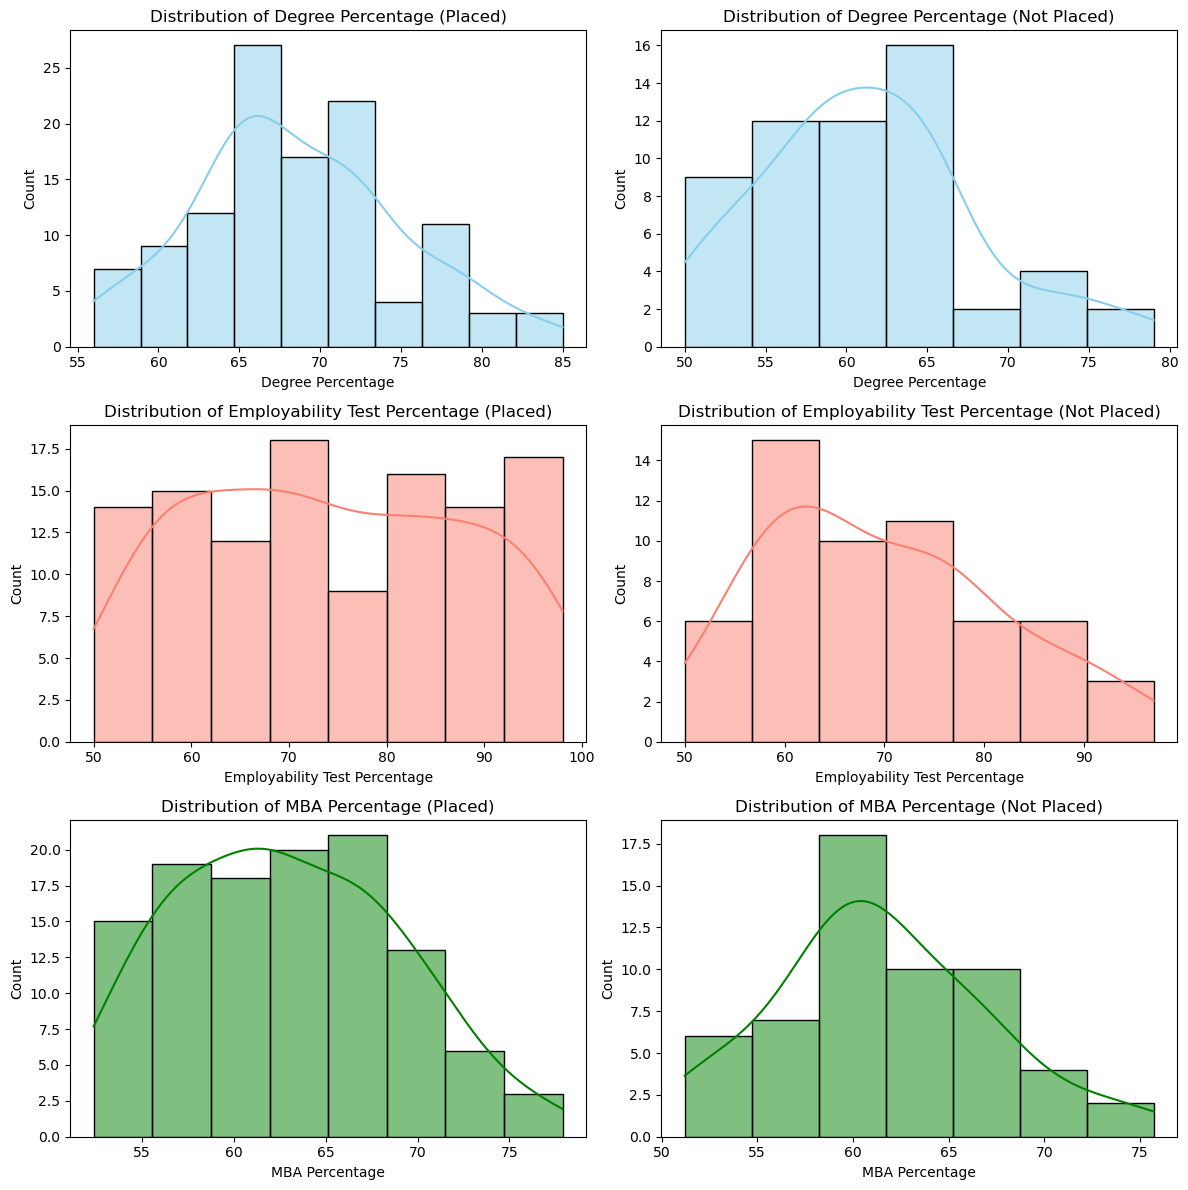

In [18]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

sns.histplot(data=train_data[train_data["status"] == 'Placed'], x="degree_p", kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Degree Percentage (Placed)')
axes[0, 0].set_xlabel('Degree Percentage')
axes[0, 0].set_ylabel('Count')

sns.histplot(data=train_data[train_data["status"] == 'Not Placed'], x="degree_p", kde=True, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Distribution of Degree Percentage (Not Placed)')
axes[0, 1].set_xlabel('Degree Percentage')
axes[0, 1].set_ylabel('Count')

sns.histplot(data=train_data[train_data["status"] == 'Placed'], x="etest_p", kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribution of Employability Test Percentage (Placed)')
axes[1, 0].set_xlabel('Employability Test Percentage')
axes[1, 0].set_ylabel('Count')

sns.histplot(data=train_data[train_data["status"] == 'Not Placed'], x="etest_p", kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Distribution of Employability Test Percentage (Not Placed)')
axes[1, 1].set_xlabel('Employability Test Percentage')
axes[1, 1].set_ylabel('Count')

sns.histplot(data=train_data[train_data["status"] == 'Placed'], x="mba_p", kde=True, ax=axes[2, 0], color='green')
axes[2, 0].set_title('Distribution of MBA Percentage (Placed)')
axes[2, 0].set_xlabel('MBA Percentage')
axes[2, 0].set_ylabel('Count')

sns.histplot(data=train_data[train_data["status"] == 'Not Placed'], x="mba_p", kde=True, ax=axes[2, 1], color='green')
axes[2, 1].set_title('Distribution of MBA Percentage (Not Placed)')
axes[2, 1].set_xlabel('MBA Percentage')
axes[2, 1].set_ylabel('Count')

plt.tight_layout()

plt.show()


**Q:** Summarize the visualizations in the above six plots.<br>
> **A:** We can see that, the graph MBA percentage(not placed) is normally distributed. also the graphs in palced(hired candidates) has high percentages.

In [19]:
# Check for the null values in train set

# Your code goes here
train_data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            57
status             0
dtype: int64

In [20]:
# Check for the null values in test set

# Your code goes here
test_data = pd.concat([X_test, y_test], axis=1)
test_data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            10
status             0
dtype: int64

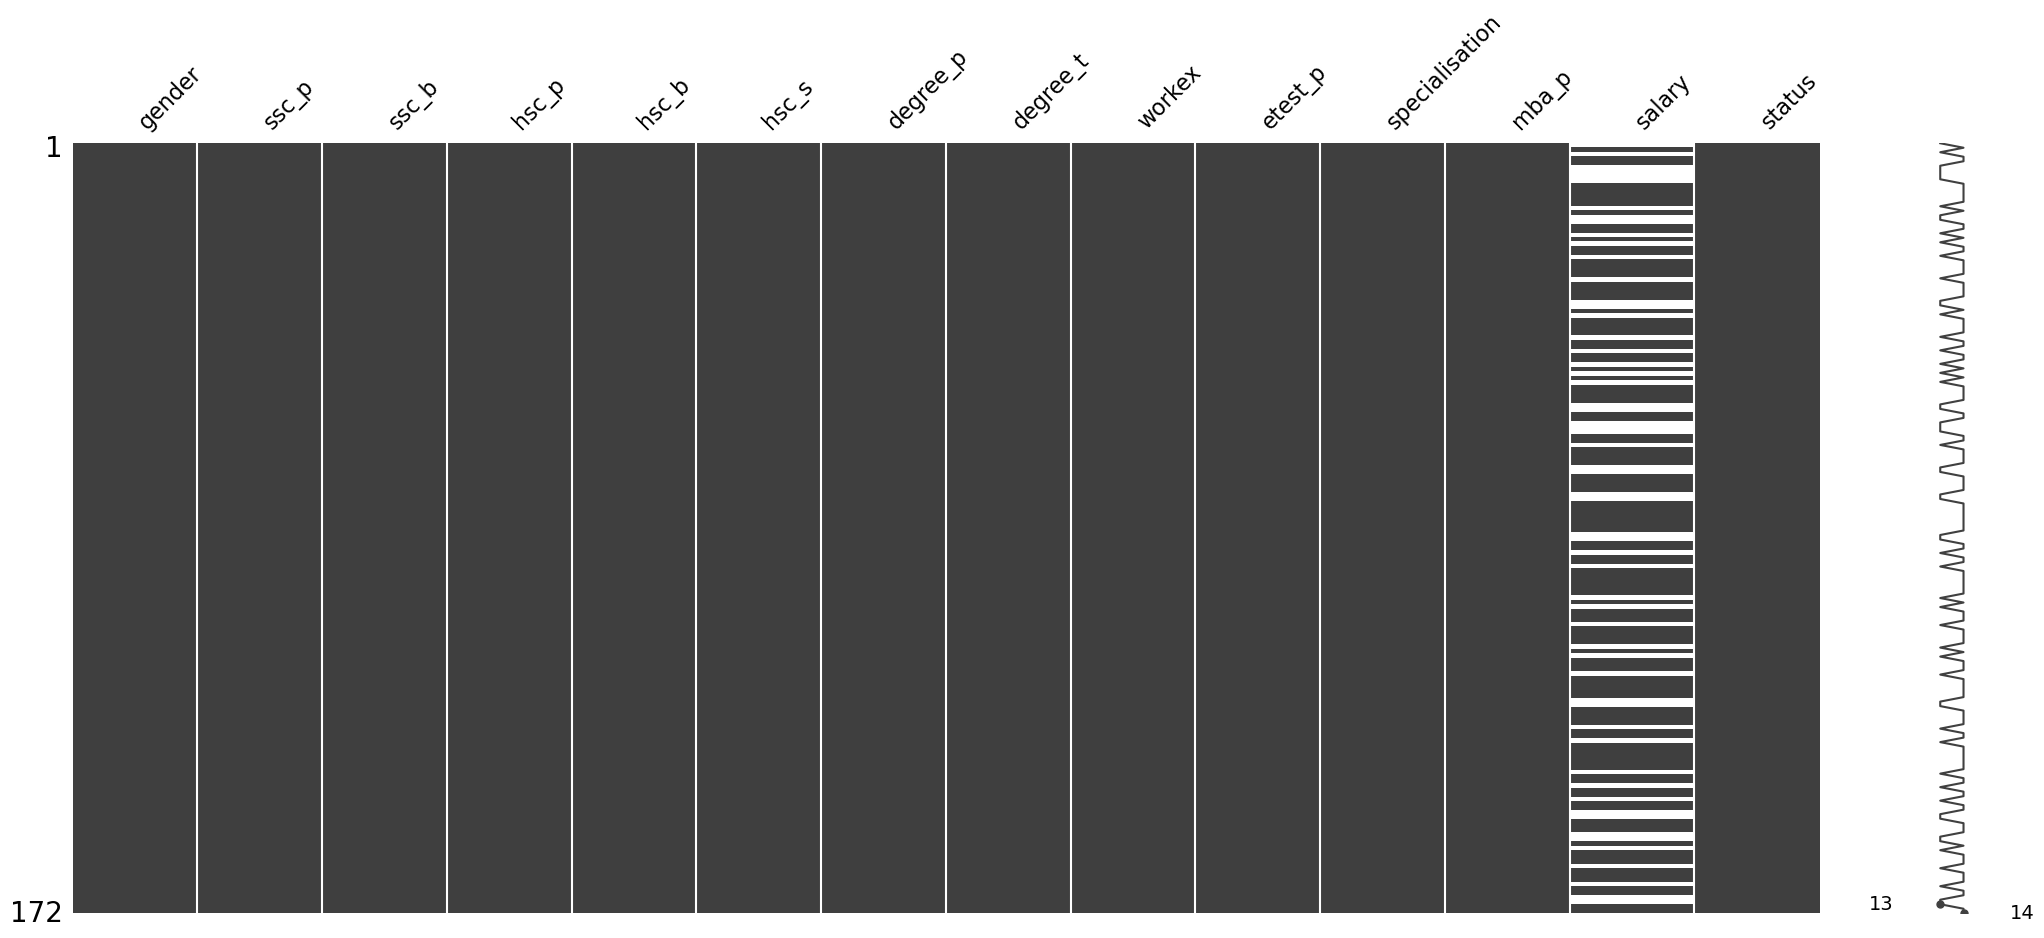

In [21]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
msno.matrix(train_data)
plt.show()


## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:** the missing values are larger compared to the total number of dataset. Therefore we can drop the salary column.


In [22]:
# Handle the missing data

# Your code goes here
X_train = X_train.drop("salary",axis=1)


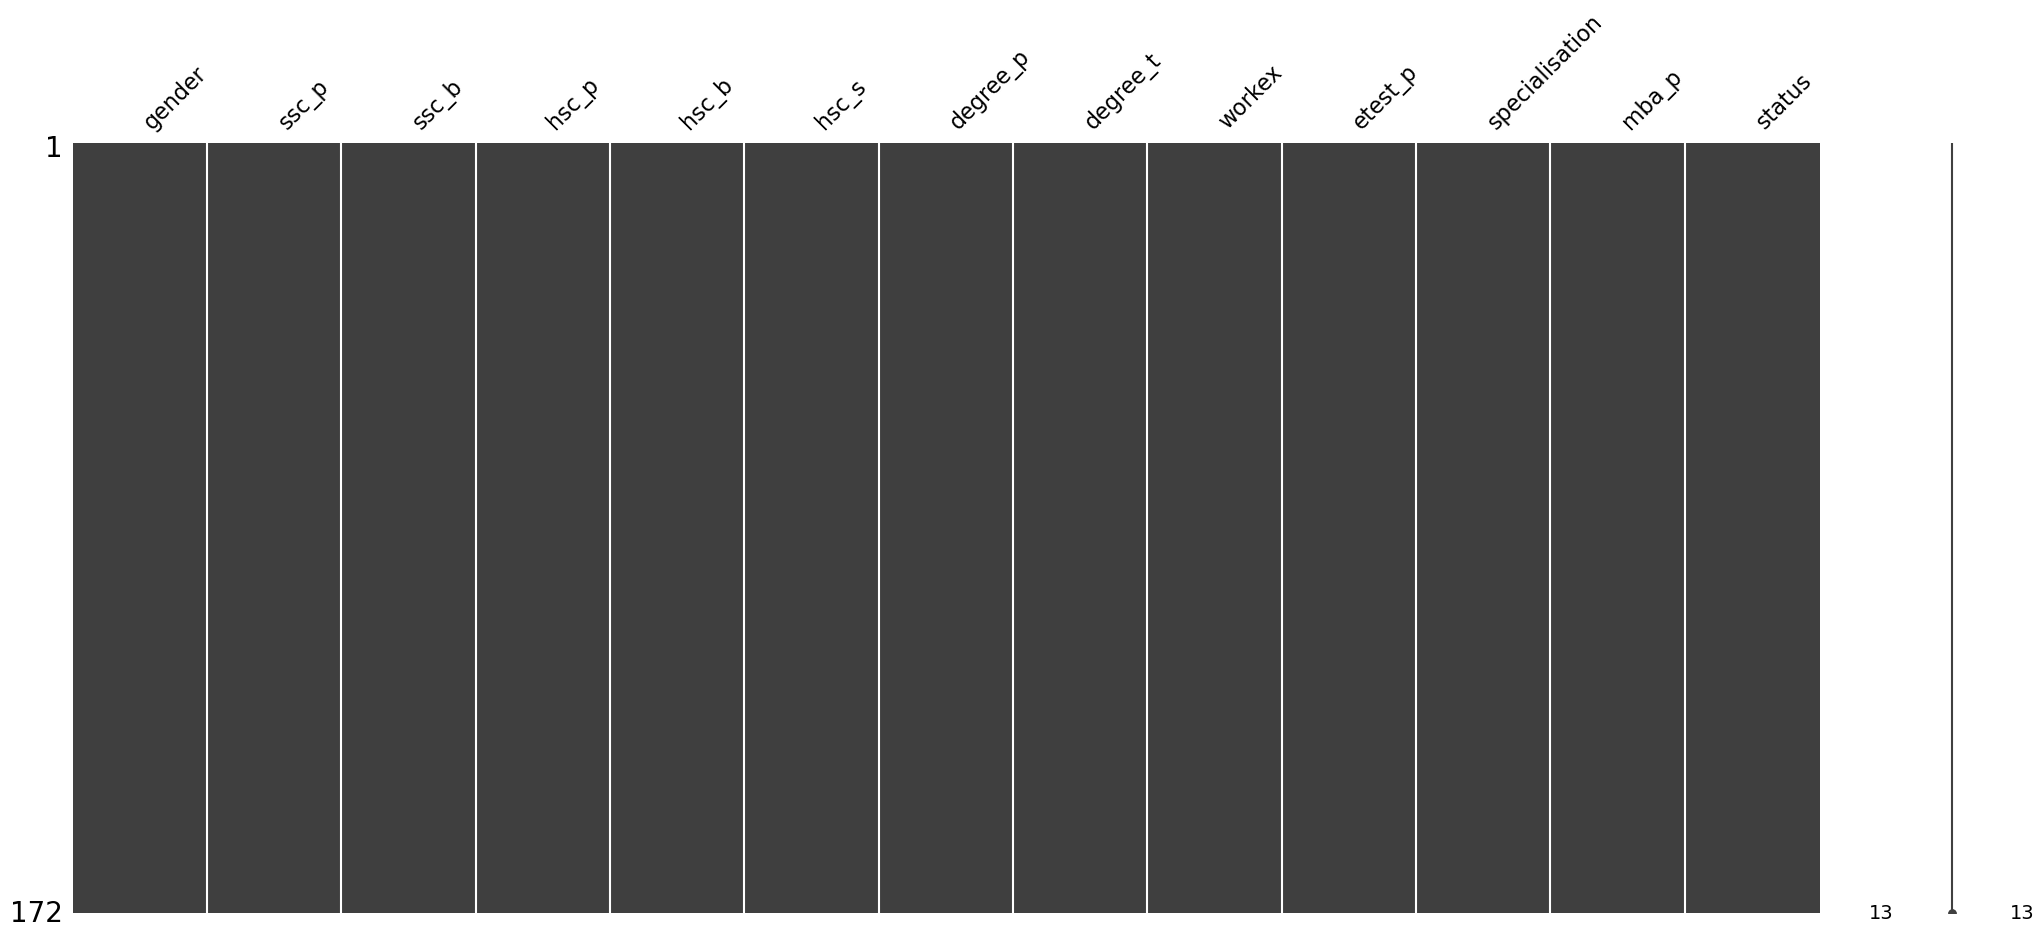

In [23]:
# Test the training dataset after processing the null values

# Your code goes here
train_data = pd.concat([X_train, y_train], axis=1)
msno.matrix(train_data)
plt.show()

In [24]:
# Process the null values in the test set

# Your code goes here
X_test = X_test.drop("salary",axis=1)

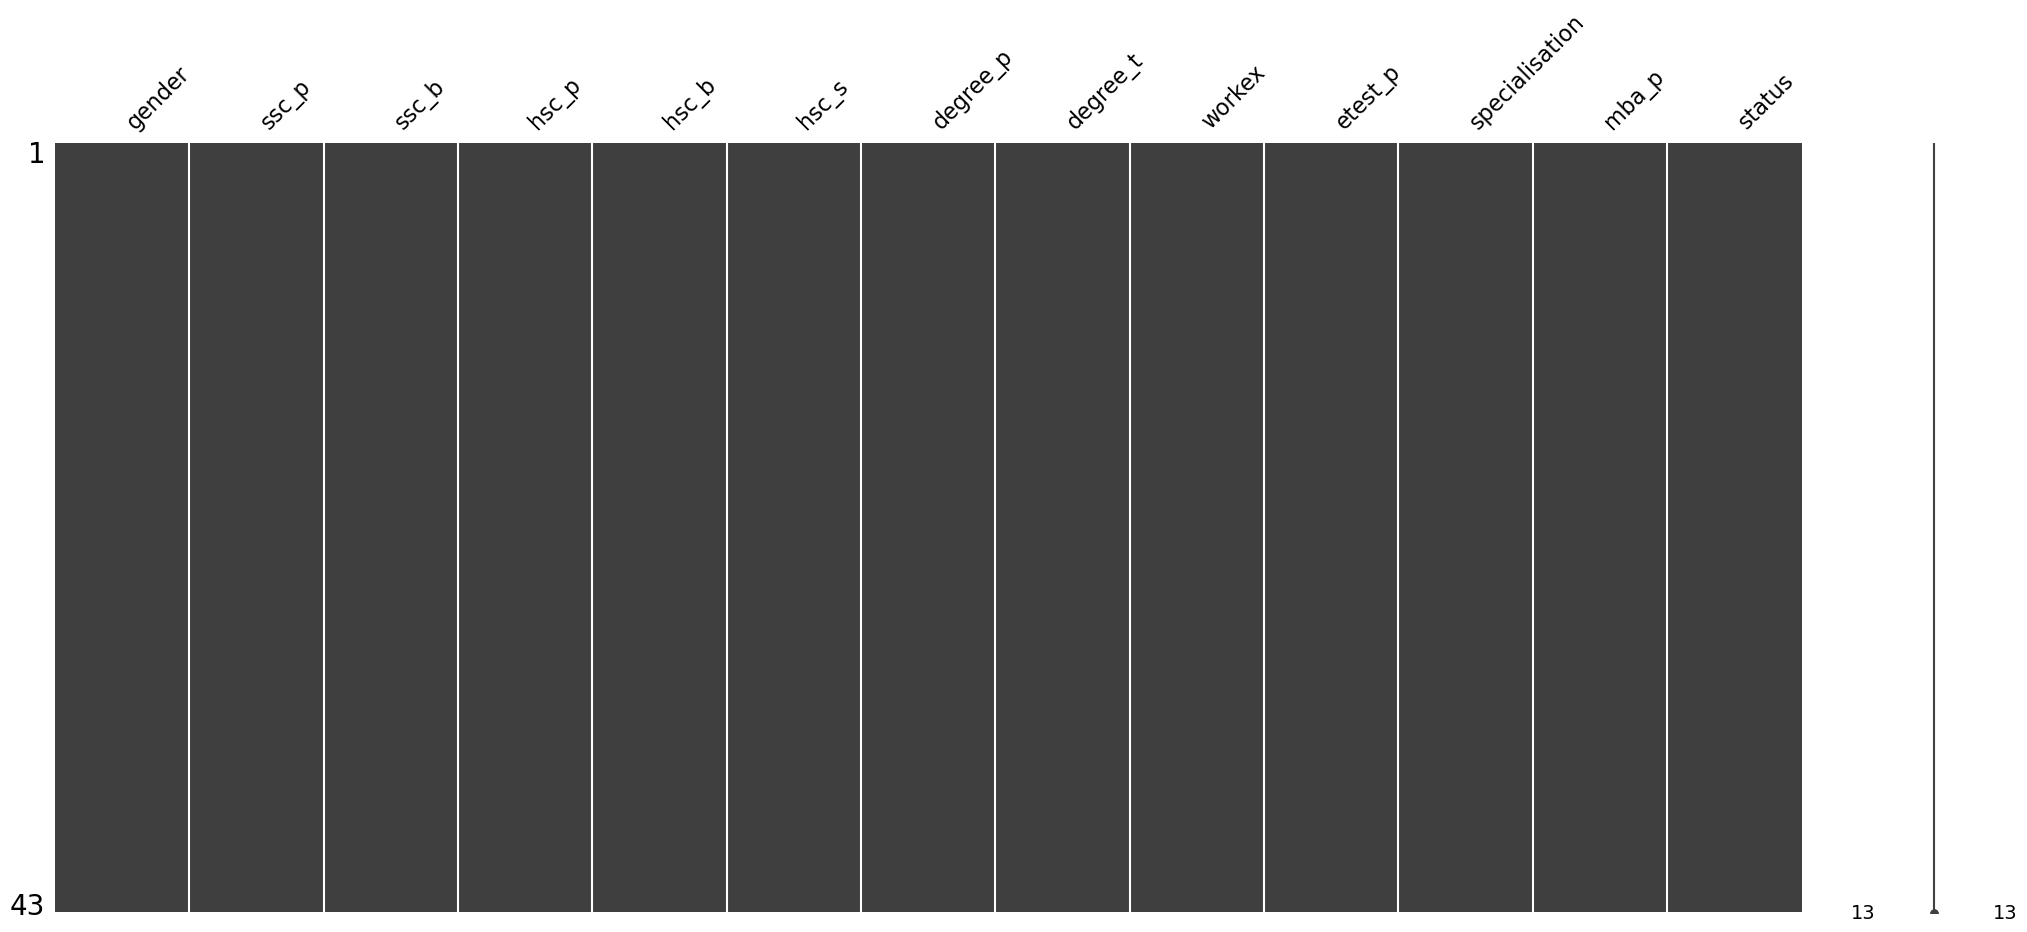

In [25]:
# Test the testing dataset after processing the null values

# Your code goes here
test_data = pd.concat([X_test, y_test], axis=1)
msno.matrix(test_data)
plt.show()

### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**
The Label encoding is selected to encode categorical values.
In label encoding, categories are represented by integer values. It is easy to use and the memory usage is less. If we use one hot encoding there is high memory usage.

In [26]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here
from sklearn.preprocessing import LabelEncoder

# List the categorical features

# Your code goes here
categorical_features = X_train.select_dtypes(include='object').columns
# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
le = LabelEncoder()
# Encode the training features

# Your code goes here
for feature in categorical_features:
    X_train[feature] = le.fit_transform(X_train[feature])



In [27]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here
X_train.dtypes


gender              int32
ssc_p             float64
ssc_b               int32
hsc_p             float64
hsc_b               int32
hsc_s               int32
degree_p          float64
degree_t            int32
workex              int32
etest_p           float64
specialisation      int32
mba_p             float64
dtype: object

In [28]:
# Encode the testing features

# Your code goes here
for feature in categorical_features:
    X_test[feature] = le.fit_transform(X_test[feature])

In [29]:
# Encode the target variable in train and test sets

# Your code goes here
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


In [30]:
# Print the encoded labels for the training set

# Your code goes here
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
170,0,63.40,1,67.20,1,1,60.0,0,0,58.06,1,69.28
157,1,66.50,0,62.50,0,1,60.9,0,0,93.40,0,55.03
155,1,51.57,1,74.66,1,1,59.9,0,1,56.15,1,65.99
90,0,85.00,1,90.00,1,1,82.0,0,0,92.00,0,68.03
138,0,82.00,1,64.00,1,2,73.0,2,1,96.00,0,71.77


### Scale the Numerical Features

In [31]:
# Standard Scale the numerical features
scalar = StandardScaler()

numarical_features= ['ssc_p','hsc_p','degree_p','etest_p','mba_p']
X_train[numarical_features] = scalar.fit_transform(X_train[numarical_features])
X_test[numarical_features] = scalar.fit_transform(X_test[numarical_features])

In [32]:
# Display the head of the scaled training set
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
170,0,-0.318426,1,0.075100,1,1,-0.841302,0,0,-1.089157,1,1.158689
157,1,-0.031035,0,-0.338914,0,1,-0.718328,0,0,1.546853,0,-1.237952
155,1,-1.415145,1,0.732238,1,1,-0.854966,0,1,-1.231624,1,0.605360
90,0,1.684038,1,2.083510,1,1,2.164739,0,0,1.442427,0,0.948458
138,0,1.405918,1,-0.206782,1,2,0.934995,2,1,1.740787,0,1.577471


In [33]:
# Display the head of the scaled testing set
X_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
54,0,0.452404,0,-0.722210,1,2,0.241150,0,0,0.660847,1,0.709193
130,1,-0.673424,0,-0.146840,1,1,-0.979744,0,0,1.147666,0,0.441224
102,0,0.733861,1,-0.607136,1,1,0.105495,0,1,-1.002451,0,-0.098516
96,0,0.640042,0,0.428530,0,2,1.190734,0,1,-0.312791,0,0.496338
64,1,1.015318,1,0.773752,1,1,1.055079,0,0,-0.718473,0,-0.579341


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**
It works by selecting a minority class instance randomly, finding its k nearest minority class neighbors, and creating synthetic instances along the line segments connecting the chosen instance and its neighbors. The synthetic instances are generated as combinations of the chosen instances in the feature space. This helps balance the class distribution in imbalanced datasets<br>
> **A2 (Advantage):**<br>

*   Addresses Class Imbalance
*   Reduces Overfitting
*   Improves the model's ability to generalize by providing more representative instances of the minority class, leading to better performance on unseen data






In [34]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here
X_train_sampled, y_train_sampled = SMOTE().fit_resample(X_train, y_train)

c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Razil\.conda\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

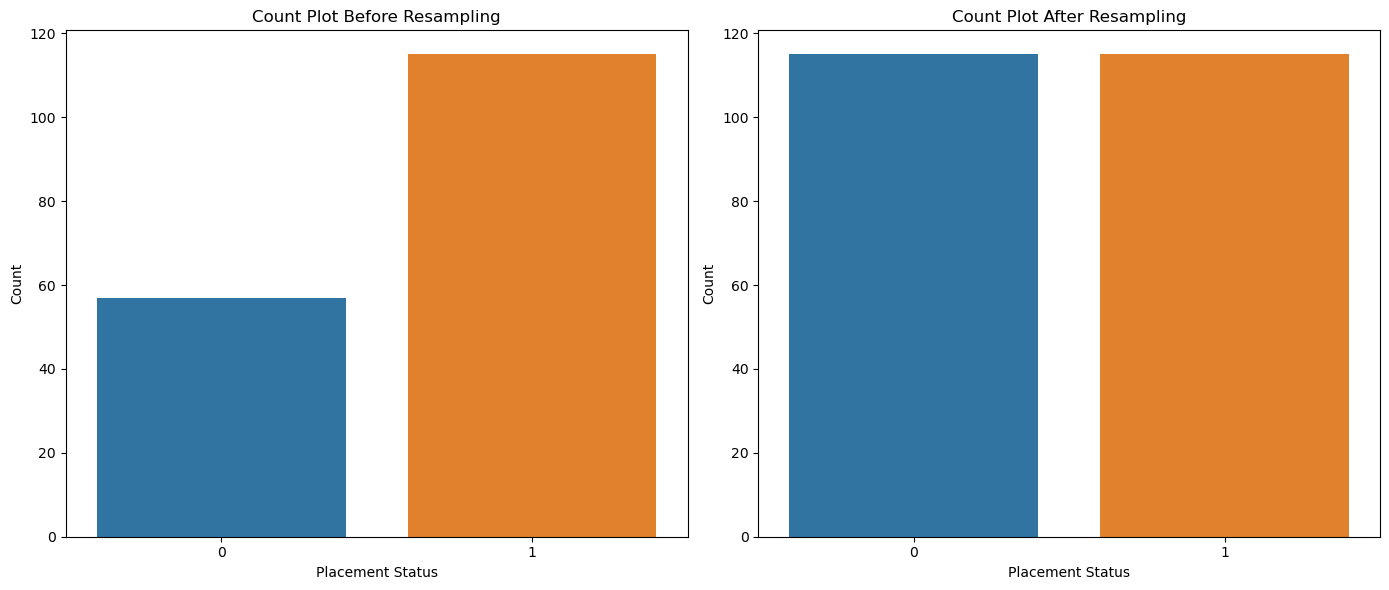

In [35]:
# plot the count plots side by side before and after resampling

# Your code goes here

plt.figure(figsize=(14, 6))

# Plot count plot before resampling
plt.subplot(1, 2, 1)
sns.countplot(x='status', data=pd.DataFrame(y_train, columns=['status']))
plt.title('Count Plot Before Resampling')
plt.xlabel('Placement Status')
plt.ylabel('Count')


# Plot count plot after resampling
plt.subplot(1, 2, 2)
sns.countplot(x='status', data=pd.DataFrame(y_train_sampled, columns=['status']))
plt.title('Count Plot After Resampling')
plt.xlabel('Placement Status')
plt.ylabel('Count')


# Adjust layout
plt.tight_layout()
plt.show()

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:** NO. we no need to oversample the testing dataset. because test dataset is a unseen dataset. the model should provide correct answer for test data. we only oversample train dataset because there can be bias towards the majority classes.

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [36]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

In [37]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
imbalanced_pipeline = make_pipeline(
    SMOTE(random_state=42),
    SVC(random_state=42))

In [38]:
# Define stratified k-fold cross validation with five folds

# Your code goes here
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**Ensures representative distribution of class labels in each fold, preventing bias in model evaluation for imbalanced datasets. Provides a more accurate assessment of model performance, especially when classes are unevenly distributed

In [39]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here
param_grid = {
    'svc__kernel': ['linear', 'sigmoid'],
    'svc__C': [0.01, 0.1, 1, 10]}


In [40]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here
grid_search = GridSearchCV(
    estimator=imbalanced_pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=stratified_kfold
)

In [41]:
# fit the grid search instance to the training data

# Your code goes here
grid_search.fit(X_train_sampled, y_train_sampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('svc', SVC(random_state=42))]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear', 'sigmoid']},
             scoring='accuracy')

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [42]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
grid_search.best_score_

0.8652173913043478

In [43]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
grid_search.best_params_

{'svc__C': 0.1, 'svc__kernel': 'linear'}

In [44]:
# Obtain the best estimator selected from the grid search

# Your code goes here
print(grid_search.best_estimator_)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('svc', SVC(C=0.1, kernel='linear', random_state=42))])


### Model Evaluation

In [45]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_estimator = grid_search.best_estimator_

best_estimator.fit(X_train_sampled, y_train_sampled)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('svc', SVC(C=0.1, kernel='linear', random_state=42))])

In [46]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
y_train_predicted = best_estimator.predict(X_train)

print("Training Accuracy : " , best_estimator.score(X_train_sampled, y_train_sampled))

Training Accuracy :  0.9


In [47]:
# Calculate the accuracy for the test set

# Your code goes here
y_test_predicted = best_estimator.predict(X_test)

print("Testing Accuracy : " , best_estimator.score(X_test, y_test))

Testing Accuracy :  0.9069767441860465


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:** this model is not overfitting. because the difference between training and testing accuracies are much low(4%). Overall accuracy is 87. It is a good value for a model.


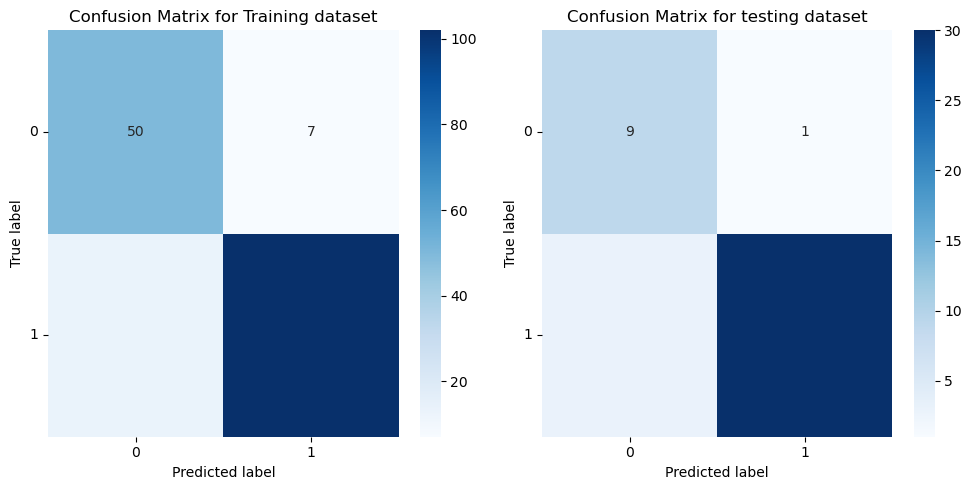

In [48]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here
def plot_confusion_matrix(ax, y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_confusion_matrix(axes[0], y_train, y_train_predicted, classes=unique_labels(y_train, y_train_predicted), title='Confusion Matrix for Training dataset')
plot_confusion_matrix(axes[1], y_test, y_test_predicted, classes=unique_labels(y_test, y_test_predicted), title='Confusion Matrix for testing dataset')

plt.tight_layout()
plt.show()


**Q:** Comment about the obtained confusion matrices. <br>
> **A:** Here we can see that the two classes are well classified because true positive and true negatives are high. therefore we can say this as a good ml model.

In [49]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here

report = classification_report(y_test, y_test_predicted)
print(report)


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.97      0.91      0.94        33

    accuracy                           0.91        43
   macro avg       0.86      0.90      0.88        43
weighted avg       0.92      0.91      0.91        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:** The model shows strong overall performance with an accuracy of 86%. It particularly excels in predicting the positive class (1), achieving high precision and recall (85%). However, the performance on the negative class (0) is relatively lower, with 64% precision and 90% recall. The weighted average F1-score is 87%, indicating a good balance between precision and recall for both classes. In summary, the model is effective, especially in identifying the positive class, but there is room for improvement in predicting the negative class.

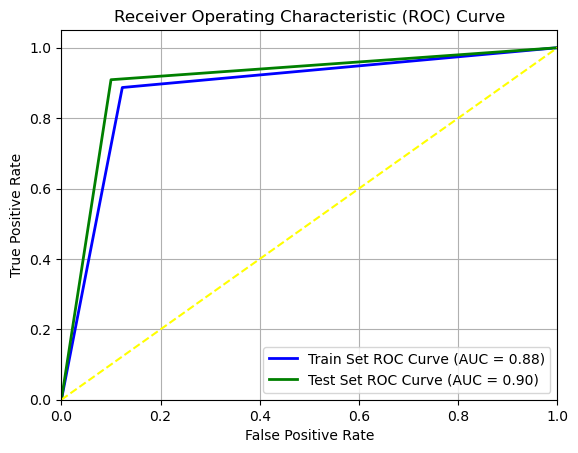

In [50]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

from sklearn.metrics import roc_curve, roc_auc_score
# Your code goes here

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_predicted)
roc_auc_train = roc_auc_score(y_train, y_train_predicted)


fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predicted)
roc_auc_test = roc_auc_score(y_test, y_test_predicted)


plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train Set ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test Set ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**Graphical representation of a classifier's performance across various decision thresholds, illustrating the trade-off between true positive rate (sensitivity) and false positive rate.
<br>
Area Under the ROC Curve, quantifies the classifier's ability to distinguish between classes; ranges from 0 to 1, with higher values indicating better performance<br>Here we can see that the AUC is close to 1 in both test and training set. therefore, this model is performing well.